In [142]:
##Importing data

In [2]:
import pandas as pd

data = pd.read_csv('mrip_catch_snapshot.csv', header=0)
print(data.head())

  Estimate Status  Year         Wave Fishing Mode Fishing Area  \
0           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
1           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
2           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
3           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
4           FINAL  2010  MARCH/APRIL        SHORE       INLAND   

          Species Group             Sub Group  Observed Harvest (A)   PSE  \
0  CARTILAGINOUS FISHES           SKATES/RAYS                     0     .   
1             CATFISHES  FRESHWATER CATFISHES                 35600  63.5   
2          OTHER FISHES          OTHER FISHES                 53567  60.7   
3      TEMPERATE BASSES          STRIPED BASS                     0     .   
4      TEMPERATE BASSES           WHITE PERCH               1313617  60.8   

   Reported Harvest (B1) PSE.1  Released Alive (B2)  PSE.2  
0                      0     .                10143  105.8  
1                 

In [3]:
catch_effort = pd.read_csv('mrip_effort_series.csv', header=0)
print(catch_effort.head())

  Estimate Status  Year         Wave  Fishing Mode     Fishing Area  \
0           FINAL  2010  MARCH/APRIL         SHORE  OCEAN (<= 3 MI)   
1           FINAL  2010  MARCH/APRIL         SHORE           INLAND   
2           FINAL  2010  MARCH/APRIL    PARTY BOAT   OCEAN (> 3 MI)   
3           FINAL  2010  MARCH/APRIL    PARTY BOAT           INLAND   
4           FINAL  2010  MARCH/APRIL  CHARTER BOAT   OCEAN (> 3 MI)   

   Angler Trips    PSE  
0          4436  109.6  
1        730139   19.1  
2           788    8.6  
3             2    8.6  
4             7   17.3  


In [4]:
df = pd.merge(data, catch_effort, how='left', on=['Year', 'Wave', 'Fishing Mode', 'Fishing Area'])


In [5]:
df.rename(columns = {'Observed Harvest (A)':'A', 'Reported Harvest (B1)':'B1', 'Released Alive (B2)':'B2'}, inplace = True) 

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estimate Status_x  2848 non-null   object
 1   Year               2848 non-null   int64 
 2   Wave               2848 non-null   object
 3   Fishing Mode       2848 non-null   object
 4   Fishing Area       2848 non-null   object
 5   Species Group      2848 non-null   object
 6   Sub Group          2848 non-null   object
 7   A                  2848 non-null   int64 
 8   PSE_x              2848 non-null   object
 9   B1                 2848 non-null   int64 
 10  PSE.1              2848 non-null   object
 11  B2                 2848 non-null   int64 
 12  PSE.2              2848 non-null   object
 13  Estimate Status_y  2848 non-null   object
 14  Angler Trips       2848 non-null   int64 
 15  PSE_y              2848 non-null   object
dtypes: int64(5), object(11)
memory usage: 378.

In [7]:
## Eploring data...

#Columns: Year - Year
#    Wave - 2 month period 
#   Fishing Mode - where fishing took place (from shore or type of boat)
#   Fishing Area - inland (but not freshwater), near-shore (within 3 miles of shore), and off-shore (over 3 miles from shore)
#   Species Group - Type of fish
#   Subgroup - More specific description of fish
#   A - Observed Harvest - NOAA official observed
#   PSE - Percent standard error. Error over 50 indicates a pretty unreliable number
#   B1 - Reported Harvest - Fisher reported but was not observed by NOAA
#   B2 - Released Alive - fish were caught and released
#   Angler Trips - number of trips reported to NOAA 
#   PSE_y - Percent standard error in angler trip number

In [8]:
df['total'] = df.A + df.B1 + df.B2
#Total - Observed Harvest + Reported Harvest + Released Alive


In [9]:
df1 = df.drop(columns=['Estimate Status_x', 'Estimate Status_y', 'A', 'PSE_x', 'PSE.1', 'B1', 'B2', 'PSE.2', 'PSE_y'])
#dropping columns with no use

In [10]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [11]:
df1.rename(columns={"Species Group": "SpecGroup", "Sub Group": "SubGroup"}, inplace=True)

In [12]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans

In [13]:
df1.head()

,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,Angler Trips,total
0,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,730139,10143
1,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,730139,96256
2,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,730139,337713
3,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,730139,714968
4,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,730139,2616125


In [14]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2848 non-null   int64 
 1   Wave          2848 non-null   object
 2   Fishing Mode  2848 non-null   object
 3   Fishing Area  2848 non-null   object
 4   SpecGroup     2848 non-null   object
 5   SubGroup      2848 non-null   object
 6   Angler Trips  2848 non-null   int64 
 7   total         2848 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 200.2+ KB
None


In [15]:
#transform 'Fishing Mode' and 'Fishing Area' colums into numerical values
le = LabelEncoder().fit(df1['Fishing Mode'])
df1['Fishing Mode'] = le.transform(df1['Fishing Mode'])

ld = LabelEncoder().fit(df1['Fishing Area'])
df1['Fishing Area'] = ld.transform(df1['Fishing Area'])

ls = LabelEncoder().fit(df1['SpecGroup'])
df1['SpecGroup'] = ls.transform(df1['SpecGroup'])

lw = LabelEncoder().fit(df1['Wave'])
df1['Wave'] = lw.transform(df1['Wave'])
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2848 non-null   int64 
 1   Wave          2848 non-null   int32 
 2   Fishing Mode  2848 non-null   int32 
 3   Fishing Area  2848 non-null   int32 
 4   SpecGroup     2848 non-null   int32 
 5   SubGroup      2848 non-null   object
 6   Angler Trips  2848 non-null   int64 
 7   total         2848 non-null   int64 
dtypes: int32(4), int64(3), object(1)
memory usage: 155.8+ KB
None


In [16]:
#tried to make a dictionary to show the old name of 'Fishing Area : New Key, but it's not working
L = list(ls.inverse_transform(df1['SpecGroup']))
d = dict(zip(ls.classes_, ls.transform(ls.classes_)))
print (d)

{'BLUEFISH': 0, 'CARTILAGINOUS FISHES': 1, 'CATFISHES': 2, 'CODS AND HAKES': 3, 'DOLPHINS': 4, 'DRUMS': 5, 'EELS': 6, 'FLOUNDERS': 7, 'GRUNTS': 8, 'HERRINGS': 9, 'JACKS': 10, 'OTHER FISHES': 11, 'PORGIES': 12, 'PUFFERS': 13, 'SCULPINS': 14, 'SEA BASSES': 15, 'SEAROBINS': 16, 'TEMPERATE BASSES': 17, 'TOADFISHES': 18, 'TRIGGERFISHES/FILEFISHES': 19, 'TUNAS AND MACKERELS': 20, 'WRASSES': 21}


In [17]:
#tried to make a dictionary to show the old name of 'Fishing Area : New Key, but it's not working
L = list(ld.inverse_transform(df1['Fishing Area']))
d = dict(zip(ld.classes_, ld.transform(ld.classes_)))
print (d)

{'INLAND': 0, 'OCEAN (<= 3 MI)': 1, 'OCEAN (> 3 MI)': 2}


In [18]:
L = list(le.inverse_transform(df1['Fishing Mode']))
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{'CHARTER BOAT': 0, 'PARTY BOAT': 1, 'PRIVATE/RENTAL BOAT': 2, 'SHORE': 3}


In [19]:
L = list(lw.inverse_transform(df1['Wave']))
d = dict(zip(lw.classes_, lw.transform(lw.classes_)))
print (d)

{'JULY/AUGUST': 0, 'MARCH/APRIL': 1, 'MAY/JUNE': 2, 'NOVEMBER/DECEMBER': 3, 'SEPTEMBER/OCTOBER': 4}


<AxesSubplot:xlabel='Wave', ylabel='count'>

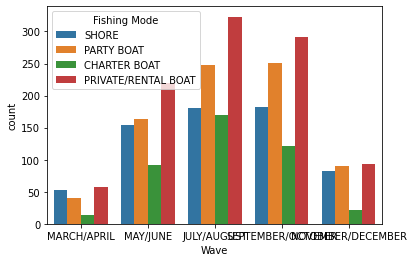

In [19]:
#I think this is a useless graph. count plot of fishing mode in each year. but the counts in the dataframe each have their own number of trips recorded?
sns.countplot(x='Wave',hue='Fishing Mode',data=df)

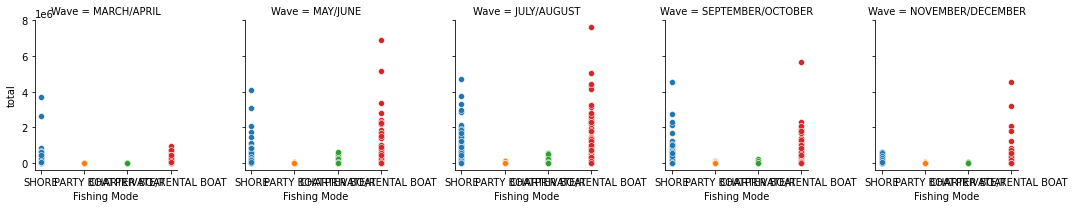

In [20]:
g = sns.FacetGrid(col='Wave',hue='Fishing Mode',data=df,legend_out=False)
g.map(sns.scatterplot,'Fishing Mode','total')

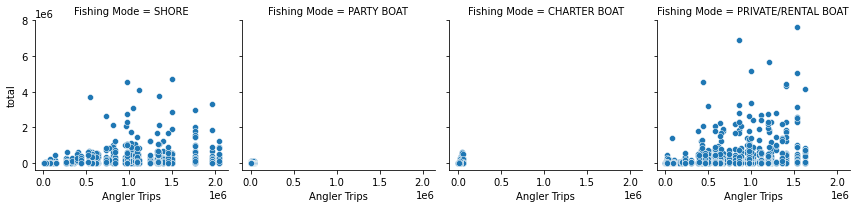

In [21]:
g = sns.FacetGrid(col='Fishing Mode',data=df,legend_out=False)
g.map(sns.scatterplot,'Angler Trips','total')

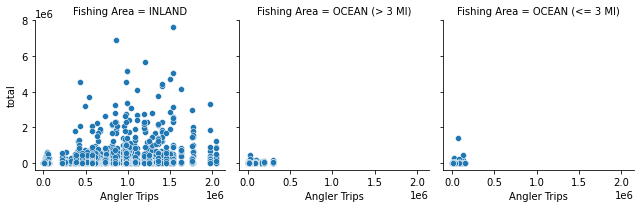

In [22]:
g = sns.FacetGrid(col='Fishing Area',data=df,legend_out=False)
g.map(sns.scatterplot,'Angler Trips','total')

<AxesSubplot:xlabel='total'>

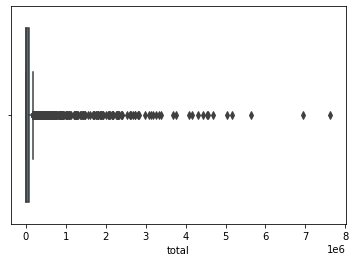

In [23]:
sns.boxplot(x=df['total'])

<AxesSubplot:>

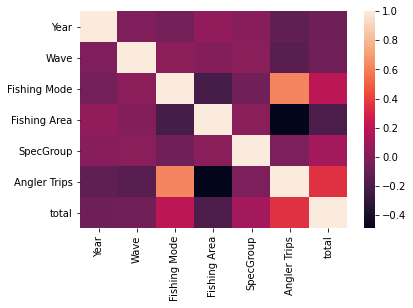

In [24]:
corr = df1.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='Fishing Mode', ylabel='Angler Trips'>

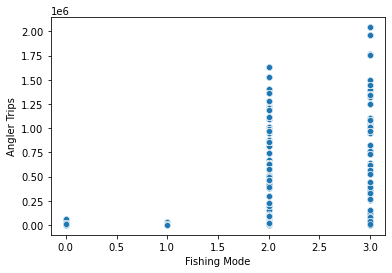

In [25]:
sns.scatterplot(data=df1, x="Fishing Mode", y="Angler Trips")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Year vs Catch Totals')

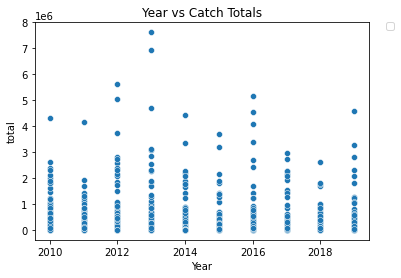

In [73]:
## Wave vs. Total fish caught
sns.scatterplot(data=df1, x="Year", y="total")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Year vs Catch Totals')

C:\Users\hindm\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0.0, 1000000.0)

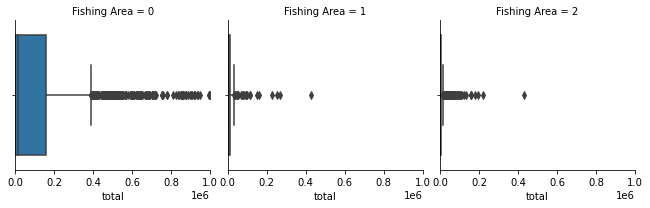

In [27]:
g = sns.FacetGrid(col='Fishing Area',data=df1,legend_out=False)
g.map(sns.boxplot,'total')
plt.xlim(0, 1000000)

C:\Users\hindm\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0.0, 1000000.0)

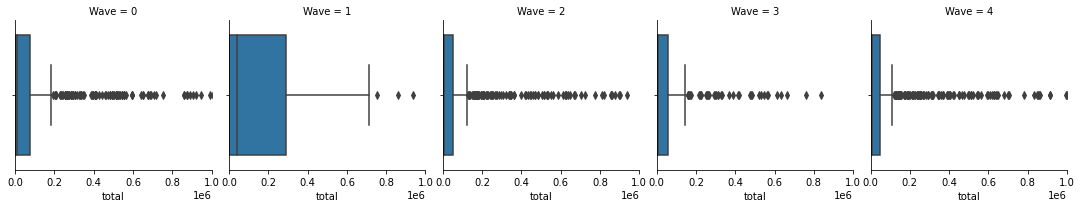

In [28]:
g = sns.FacetGrid(col='Wave',data=df1,legend_out=False)
g.map(sns.boxplot,'total')
plt.xlim(0, 1000000)

In [20]:
#looking for an outlier using z-score
from scipy import stats
z = np.abs(stats.zscore(df['total']))
print(z)

[0.29196507 0.12413102 0.34646815 ... 0.00532011 0.31024667 0.27825582]


In [21]:
#set threshold to 3 std deviations
threshold = 3
print(np.where(z > 3))

(array([   4,   68,   90,   94,  149,  152,  160,  182,  260,  459,  543,
        598,  644,  654,  662,  712,  722,  723,  733,  734,  781,  791,
        792,  841,  866,  867,  875,  886,  888,  894,  941,  944,  952,
        953, 1065, 1106, 1123, 1130, 1192, 1194, 1205, 1264, 1296, 1434,
       1512, 1513, 1540, 1570, 1623, 1624, 1723, 1724, 1852, 1938, 1954,
       2026, 2030, 2042, 2043, 2182, 2364, 2365, 2504, 2698, 2711, 2712,
       2727, 2805, 2806], dtype=int64),)


C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

(0.0, 1000000.0)

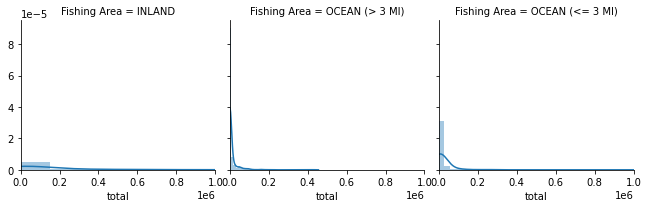

In [31]:
g = sns.FacetGrid(col='Fishing Area',data=df,legend_out=False)
g.map(sns.distplot,'total')
plt.xlim(0, 1000000)

In [22]:
#Total catch varies such a large amount. I'm going to incorporate a catch per trip column, which divides the total catch
#by the number of angler trips recorded.

df1['CatchPerTrip'] = np.where(df1['total'] < 1, df1['total'], df1['total']/df1['Angler Trips'])
df1.head()

,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,Angler Trips,total,CatchPerTrip
0,2010,1,3,0,1,SKATES/RAYS,730139,10143,0.013892
1,2010,1,3,0,2,FRESHWATER CATFISHES,730139,96256,0.131832
2,2010,1,3,0,11,OTHER FISHES,730139,337713,0.462532
3,2010,1,3,0,17,STRIPED BASS,730139,714968,0.979222
4,2010,1,3,0,17,WHITE PERCH,730139,2616125,3.583051


Text(0.5, 1.0, 'Average Catch per Fishing Trip (2010-2019)')

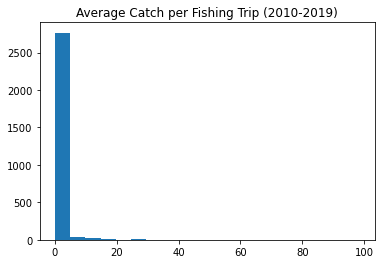

In [17]:
plt.hist(df1['CatchPerTrip'], bins=20)
plt.title('Average Catch per Fishing Trip (2010-2019)')

In [23]:
df1['Angler Trips'].sum()

1180002824

In [20]:
df1['CatchPerTrip'].describe()

count    2848.000000
mean        0.852991
std         3.606193
min         0.000000
25%         0.019794
50%         0.103738
75%         0.500000
max        98.437743
Name: CatchPerTrip, dtype: float64

<AxesSubplot:>

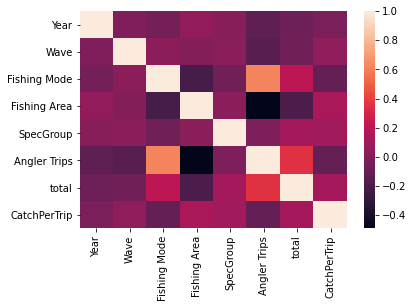

In [33]:
corr = df1.corr()
sns.heatmap(corr)

Text(0.5, 1.0, 'Fishing Mode vs Total Catch')

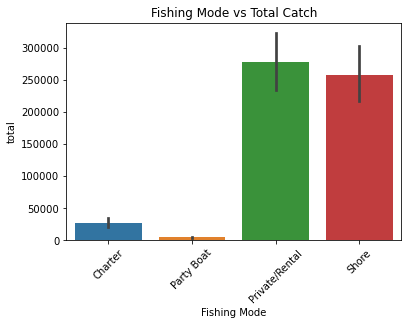

In [75]:
ax = sns.barplot(x="Fishing Mode", y="total", data=df1)
ax.set_xticklabels(
    labels=["Charter","Party Boat", "Private/Rental", "Shore"], rotation=45)
plt.title('Fishing Mode vs Total Catch')

In [27]:
floatdf = df1.drop(columns=['SubGroup'])

In [28]:
df = floatdf.rename(columns={"Fishing Mode": "Mode", "Fishing Area": "Area", "Angler Trips": "AnglerTrips"})
df.head()

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.013892
1,2010,1,3,0,2,730139,96256,0.131832
2,2010,1,3,0,11,730139,337713,0.462532
3,2010,1,3,0,17,730139,714968,0.979222
4,2010,1,3,0,17,730139,2616125,3.583051


In [29]:
from patsy import dmatrices
import statsmodels.api as sm

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
X = df[['Year','Wave','Mode','Area']]
y = df['CatchPerTrip']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.03540582235317968

ValueError: x and y must be the same size

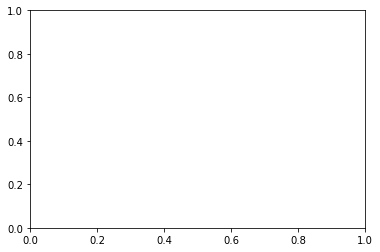

In [99]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, reg_all.predict(X_train), color = 'blue')
plt.title('Actual Points vs Predicted')
plt.xlabel('Year+Wave+Mode+Area')
plt.ylabel('Catch Per Trip')
plt.show()


In [93]:
df['CatchPerTrip'].describe()

count    2848.000000
mean        0.852991
std         3.606193
min         0.000000
25%         0.019794
50%         0.103738
75%         0.500000
max        98.437743
Name: CatchPerTrip, dtype: float64

In [37]:
np.random.seed(47)
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=2242
Testing data set length=606


In [38]:
df.head()

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.013892
1,2010,1,3,0,2,730139,96256,0.131832
2,2010,1,3,0,11,730139,337713,0.462532
3,2010,1,3,0,17,730139,714968,0.979222
4,2010,1,3,0,17,730139,2616125,3.583051


In [39]:
expr = """CatchPerTrip ~ Mode  + Area + Wave """

In [40]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [41]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [42]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           CatchPerTrip   No. Observations:                 2242
Model:                            GLM   Df Residuals:                     2238
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4454.9
Date:                Wed, 21 Apr 2021   Deviance:                       6721.2
Time:                        19:30:57   Pearson chi2:                 1.82e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2458      0.057     -4.343      0.0

In [43]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
1     0.261091  0.014739       0.233745       0.291638
17    0.394062  0.016464       0.363079       0.427689
20    0.394062  0.016464       0.363079       0.427689
24    0.513882  0.025718       0.465868       0.566844
27    0.513882  0.025718       0.465868       0.566844
...        ...       ...            ...            ...
2828  2.303977  0.071129       2.168701       2.447691
2834  1.526533  0.058794       1.415540       1.646228
2841  0.519092  0.019835       0.481635       0.559461
2843  0.519092  0.019835       0.481635       0.559461
2846  0.519092  0.019835       0.481635       0.559461

[606 rows x 4 columns]


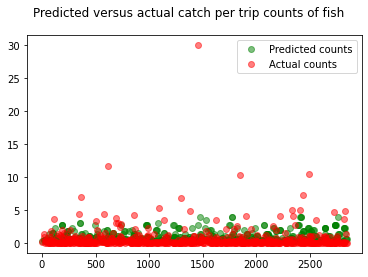

In [44]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['CatchPerTrip']
fig = plt.figure()
fig.suptitle('Predicted versus actual catch per trip counts of fish')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts', alpha=0.5, linestyle='none') #check
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts', alpha=0.5, linestyle='none')
plt.legend(handles=[predicted, actual])
plt.show()

In [45]:
print('Poisson RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts,actual_counts),2)))))

Poisson RMSE=44.19149935076705


<Figure size 432x288 with 0 Axes>

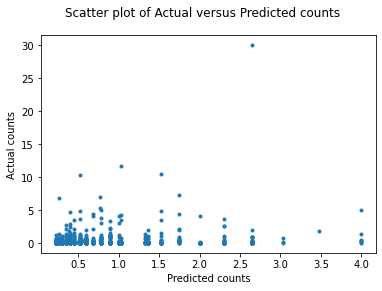

In [46]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

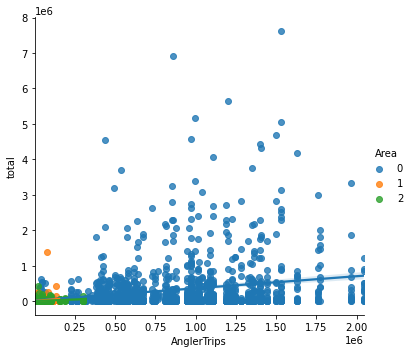

In [47]:
sns.lmplot(x='AnglerTrips', y='total', data=df, hue='Area')
plt.show()

In [48]:
#zero inflated poisson model
df.head(10)

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.013892
1,2010,1,3,0,2,730139,96256,0.131832
2,2010,1,3,0,11,730139,337713,0.462532
3,2010,1,3,0,17,730139,714968,0.979222
4,2010,1,3,0,17,730139,2616125,3.583051
5,2010,1,1,2,3,788,47,0.059645
6,2010,1,1,2,6,788,31,0.039340
7,2010,1,1,2,15,788,94,0.119289
8,2010,1,1,2,21,788,63,0.079949
9,2010,1,1,2,21,788,3924,4.979695


In [101]:
print(len(df[df['CatchPerTrip'] < 1]))

2415


In [33]:
#realized there are a lot of numbers <1 in CatchPerTrip. Since there is no such thing as half a fish, I'm reducing these numbers to zero.
df.CatchPerTrip[df.CatchPerTrip < 1] = 0
df.groupby('CatchPerTrip').count()

<ipython-input-33-1da74abf8ced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CatchPerTrip[df.CatchPerTrip < 1] = 0


,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total
CatchPerTrip,,,,,,,
0.000000,2415,2415,2415,2415,2415,2415,2415
1.000000,3,3,3,3,3,3,3
1.004530,1,1,1,1,1,1,1
1.007584,1,1,1,1,1,1,1
1.010653,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
38.800000,1,1,1,1,1,1,1
45.327911,1,1,1,1,1,1,1
46.910665,1,1,1,1,1,1,1


In [103]:
df.head()

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.000000
1,2010,1,3,0,2,730139,96256,0.000000
2,2010,1,3,0,11,730139,337713,0.000000
3,2010,1,3,0,17,730139,714968,0.000000
4,2010,1,3,0,17,730139,2616125,3.583051


In [104]:
df['CatchPerTrip'].describe()

count    2848.000000
mean        0.703402
std         3.628165
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        98.437743
Name: CatchPerTrip, dtype: float64

In [105]:
np.random.seed(47)
mask = np.random.rand(len(df)) < 0.8
df_train2 = df[mask]
df_test2 = df[~mask]
print('Training data set length='+str(len(df_train2)))
print('Testing data set length='+str(len(df_test2)))

Training data set length=2242
Testing data set length=606


In [108]:
expr = """CatchPerTrip ~ Mode  + Area + Wave + Year """

In [109]:
y_train1, X_train1 = dmatrices(expr, df_train2, return_type='dataframe')
y_test1, X_test1 = dmatrices(expr, df_test2, return_type='dataframe')

In [110]:
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train1, exog=X_train1, exog_infl=X_train1, inflation='logit').fit()

         Current function value: 7.305597
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1081: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1258: RuntimeWarning: overflow encountered in exp
  L = np.exp(np.dot(X,params) + offset + exposure)
C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1259: RuntimeWarning: invalid value encountered in multiply
  return (self.endog - L)[:,None] * X
C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:852: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\discrete\disc

In [111]:
print(zip_training_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:            CatchPerTrip   No. Observations:                 2242
Model:             ZeroInflatedPoisson   Df Residuals:                     2237
Method:                            MLE   Df Model:                            4
Date:                 Fri, 23 Apr 2021   Pseudo R-squ.:                  -4.863
Time:                         13:03:34   Log-Likelihood:                -16379.
converged:                       False   LL-Null:                       -2793.6
Covariance Type:             nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     0.1000   1.23e+09   8.13e-11      1.000   -2.41e+09    2.41e+09
inflate_Mode          0.1000   1.85e+06   5.41e-08      1.000   -3.62e+06    3.62e+06
inflate_Area    

In [53]:
from sklearn.model_selection import cross_val_score

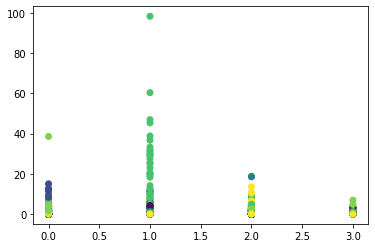

In [54]:
xs= df['Mode']
ys = df['CatchPerTrip']
plt.scatter(xs, ys, c=df['SpecGroup'])
plt.show()

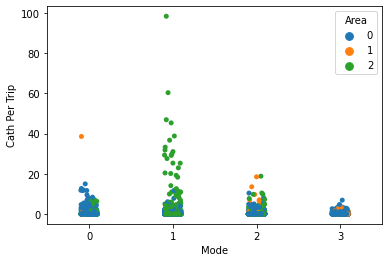

In [55]:
sns.stripplot(x='Mode', y='CatchPerTrip', data=df, hue='Area')
plt.ylabel('Cath Per Trip')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

X = df[['Year', 'Wave', 'Area', 'Mode']]
y = df['CatchPerTrip']


lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y) #turning y from continuous into integers
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.25, random_state=23)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.8525280898876404

In [36]:
#comparing error with K
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

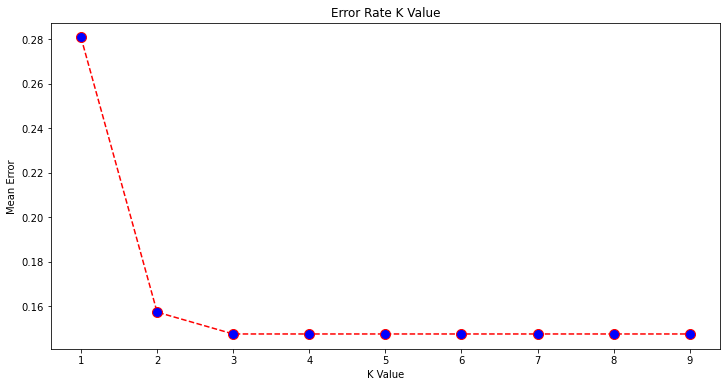

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#looks like the ideal k is either 2 or 3

In [63]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.8426966292134831

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

#k=3 is best

0.8525280898876404

In [39]:


#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[607   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       607
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          31       0.00      0.00      0.00        

C:\Users\hindm\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hindm\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


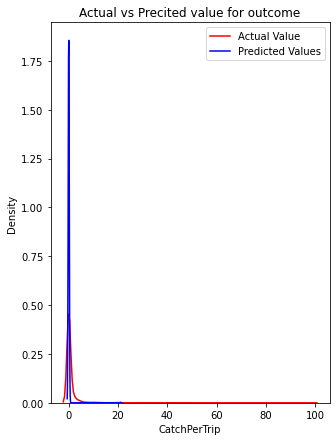

In [43]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(df['CatchPerTrip'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [65]:
from sklearn.metrics import roc_curve

y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_prob)


plt.plot([0,1], [0,1], 'k--')
plt.plot(fale_positive_rate1, true_positive_rate1, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K Nearest Neighbors ROC Curve')
plt.show()

#ROC curve not working because my y is not logistic. how do I fix this?

ValueError: multiclass format is not supported

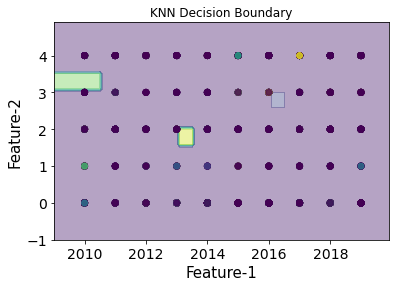

In [66]:
from sklearn import datasets, neighbors
#from mlxtend.plotting import plot_decision_regions

knn1 = KNeighborsClassifier
def plot_decision_boundaries(X, y, model_class, k):
    
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(k)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt
    
    
plt.figure()
plt.title('KNN Decision Boundary')
plot_decision_boundaries(X_train, y_train, knn1, 3)
plt.show()

In [1]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

NameError: name 'plt' is not defined